#### Problème 1. Résolution par la méthode aux Différences Finies de l’équation de Black et Scholes pour l’option ASSET or NOTHING.

In [2]:
import numpy as np 
import scipy.stats as ss
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


ImportError: cannot import name 'docstring' from 'matplotlib' (/home/cytech/.local/lib/python3.10/site-packages/matplotlib/__init__.py)

/tmp/ipykernel_22746/2413803917.py:40: RuntimeWarning: overflow encountered in scalar divide
  - 0.5 * sigma**2 * S[i]**2 * (V[j+1, i+1] - 2 * V[j+1, i] + V[j+1, i-1]) / DeltaS**2
/tmp/ipykernel_22746/2413803917.py:39: RuntimeWarning: invalid value encountered in scalar subtract
  -r * S[i] * (V[j+1, i+1] - V[j+1, i-1]) / (2 * DeltaS)


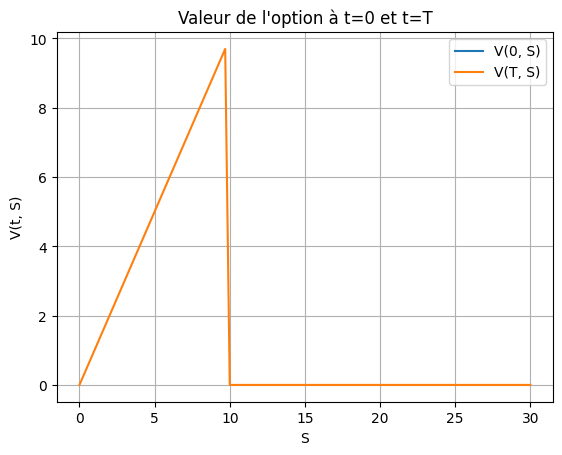

In [ ]:
# Paramètres
N = 99
M = 4999
L = 30
T = 0.5
r = 0.1
sigma = 0.5
K = 10

# Discrétisation
DeltaS = L / N
DeltaT = T / M

# Initialisation des grilles
S = np.linspace(0, L, N+1)
t = np.linspace(0, T, M+1)

# Initialisation de la matrice V
V = np.zeros((M+1, N+1))

# Condition initiale (Pay-off)
for i in range(N+1):
    if S[i] < K:
        V[M, i] = S[i]
    else:
        V[M, i] = 0

# Conditions aux bords
V[:, 0] = 0
V[:, N] = 0

# Boucle de mise à jour
for j in range(M-1, -1, -1):
    for i in range(1, N):
        V[j, i] = V[j+1, i] + DeltaT * (
            -r * S[i] * (V[j+1, i+1] - V[j+1, i-1]) / (2 * DeltaS)
            - 0.5 * sigma**2 * S[i]**2 * (V[j+1, i+1] - 2 * V[j+1, i] + V[j+1, i-1]) / DeltaS**2
            + r * V[j+1, i]
        )

# Résultats finaux
V_initial = V[0, :]  # Valeurs à t = 0
V_final = V[M, :]    # Valeurs à t = T

# Affichage des résultats
plt.plot(S, V_initial, label='V(0, S)')
plt.plot(S, V_final, label='V(T, S)')
plt.xlabel('S')
plt.ylabel('V(t, S)')
plt.title('Valeur de l\'option à t=0 et t=T')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
S_mesh, t_mesh = np.meshgrid(S, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S_mesh, t_mesh, V, cmap='viridis')

ax.set_xlabel('S')
ax.set_ylabel('t')
ax.set_zlabel('V(t, S)')
ax.set_title('Surface des prix V(t, S)')

plt.show()

ValueError: Unknown projection '3d'

<Figure size 640x480 with 0 Axes>

In [1]:
import polars as pl

In [9]:
path='/home/cytech/AirPassengers.csv'
df = pl.scan_csv(path)

In [11]:
mask= df.collect().is_duplicated()

In [ ]:
df.filter(mask).collect() 

t,Airpass
str,i64
